### Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

import os
from random import shuffle
from PIL import Image
import h5py

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SequentialSampler

### Parameters

In [8]:
dataset_path = '/pio/lscratch/1/i279076/Medical/medical.h5'
batch_size = 1024

### Dataset

In [6]:
class MedicalDataset(Dataset):
    def __init__(self, images, masks, patch_size=32):
        self.images = images
        self.masks = masks
        
        self.patch_size = patch_size
        
        self.images_count, self.image_size, _, _ = self.images.shape
        self.patches_per_side = self.image_size - self.patch_size + 1
        self.patches_per_image = self.patches_per_side ** 2
    
    def __len__(self):
        return self.images_count * self.patches_per_image
    
    def __getitem__(self, idx):
        image_idx = idx // self.patches_per_image
        patch_idx = idx % self.patches_per_image
        
        image = self.images[image_idx]
        mask = self.masks[image_idx]
        
        y = patch_idx // self.patches_per_side
        x = patch_idx % self.patches_per_side
        
        patch = image[y: y + self.patch_size, x: x + self.patch_size].transpose(2, 0, 1) / 255.
        label = mask.item((y + self.patch_size // 2, x + self.patch_size // 2, 0)) // 255
        
        return (patch, label)

In [9]:
with h5py.File(dataset_path, 'r') as f:
    train_images = f['train']['images'][...]
    train_masks = f['train']['masks'][...]

In [10]:
train_dataset = MedicalDataset(train_images, train_masks)

In [33]:
image = train_images[1100] / 255.
mask = train_masks[1100] // 255

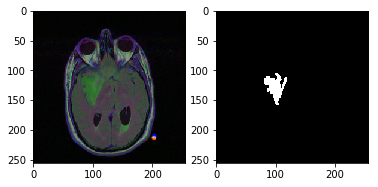

In [34]:
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(mask.reshape(256, 256), cmap='gray')
plt.show()

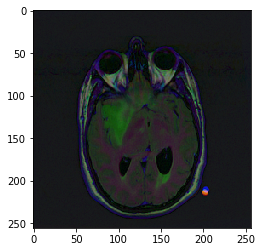

In [37]:
plt.imshow(np.abs(image - image.reshape(-1, 3).mean(0)))
plt.show()

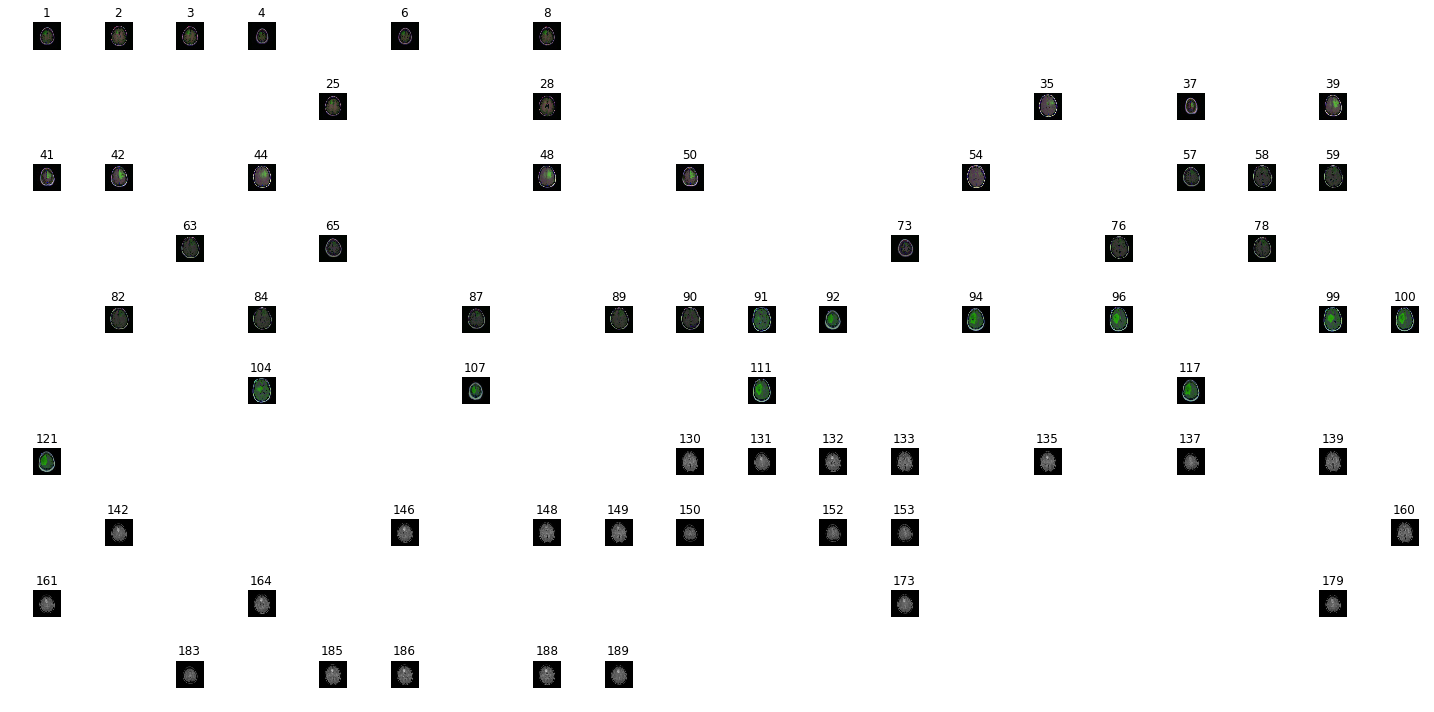

In [46]:
plt.figure(figsize=(20, 10))
for i in range(1, 201):
    plt.subplot(10, 20, i)
    if train_masks[i].sum() > 0:
        plt.title(i)
        plt.imshow(train_images[i])
    plt.axis('off')
plt.tight_layout()
plt.show()